In [1]:
import funcs as funcs

In [2]:
import pandas as pd
import numpy as np
import math

In [53]:
numerical_features = pd.read_csv('numerical_features.csv')

In [54]:
multinomial_features = pd.read_csv('multinomial_features.csv')

In [55]:
numerical_features

,short_day,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,month
0,2013-01-01 00:00:00,29.340833,16.333333,30.625000,55.625000,5
1,2013-01-02 00:00:00,29.359167,2.958333,8.416667,78.625000,5
2,2013-01-03 00:00:00,29.560417,13.375000,27.916667,54.541667,5
3,2013-01-04 00:00:00,29.714167,2.375000,10.958333,69.375000,5
4,2013-01-05 00:00:00,29.543333,4.875000,16.416667,60.958333,5
...,...,...,...,...,...,...
11422,1982-12-27 00:00:00,30.000000,5.333333,14.000000,69.000000,5
11423,1982-12-28 00:00:00,30.000000,13.000000,18.000000,81.000000,5
11424,1982-12-29 00:00:00,30.000000,24.400000,39.000000,57.000000,5
11425,1982-12-30 00:00:00,30.174583,27.250000,30.166667,89.333333,5


In [58]:
multinomial_features

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,month
0,1996,"['SN', 'SN', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG...","['FG', 'FG', 'FG', 'FG', 'SN', 'FG', 'SN', 'SN...","['SN', 'SN', 'SN', 'SN', 'SN', 'RA']","['SN', 'SN', 'RA']","['RA', 'FG', 'RA', 'RA']","['RA', 'SN']","['RA', 'RA']",[],"['SN', 'RA', 'SN', 'SN']","['RA', 'SN', 'SN', 'SN', 'SN', 'SN', 'SN', 'SN...","['SN', 'SN', 'SN', 'SN', 'SN', 'SN', 'SN']","['SN', 'SN', 'SN', 'SN', 'SN']",05
1,1997,"['BR', 'BR', 'SN', 'SN', 'BR']","['BR', 'SN', 'BR', 'BR', 'SN']","['SN', 'SN', 'SN']","['SN', 'SN', 'SN', 'RA']","['RA', 'RA', 'RA', 'RA', 'RA', 'RA']",['RA'],"['RA', 'RA', 'RA']","['RA', 'RA', 'RA', 'RA', 'RA', 'RA', 'RA', 'RA...",[],[],[],[],04
2,1998,"['SN', 'SN', 'SN', 'BR', 'FG', 'BR', 'HZ', 'SN...","['SN', 'BR', 'HZ', 'RA', 'SN', 'BR', 'SN', 'BR...","['SN', 'SN', 'BR', 'SN', 'BR', 'SN', 'BR', 'SN...","['SN', 'BR', 'RA', 'RA', 'SN', 'BR', 'SN', 'BR...","['RA', 'SN', 'BR', 'SN', 'BR', 'RA', 'RA', 'RA...","['RA', 'RA', 'RA', 'RA', 'RA', 'RA', 'RA', 'FG...","['RA', 'RA', 'RA', 'BR', 'RA', 'RA', 'BR', 'RA...","['RA', 'RA', 'BR', 'RA', 'RA', 'RA', 'BR', 'RA...","['RA', 'RA', 'RA', 'BR', 'FG', 'BR', 'RA', 'RA...","['SN', 'BR', 'SN', 'BR', 'SN', 'BR', 'FG', 'BR...","['BR', 'SN', 'SN', 'SN', 'HZ', 'SN', 'BR', 'SN...","['SN', 'BR', 'SN', 'BR', 'SN', 'BR', 'SN', 'BR...",04
3,1999,"['SN', 'SN', 'BR', 'HZ', 'BR', 'SN', 'BR', 'SN...","['SN', 'SN', 'HZ', 'SN', 'BR', 'HZ', 'SN', 'BR...","['SN', 'BR', 'SN', 'BR', 'SN', 'BR', 'HZ', 'HZ...","['SN', 'BR', 'SN', 'BR', 'SN', 'FG', 'SN', 'RA...","['SN', 'BR', 'RA', 'RA', 'RA', 'FG', 'BR', 'RA...","['RA', 'BR', 'RA', 'RA', 'RA', 'RA', 'RA', 'BR...","['HZ', 'HZ', 'RA', 'HZ', 'RA', 'RA', 'RA', 'RA...","['RA', 'RA', 'BR', 'RA', 'RA', 'BR', 'FG', 'BR...","['RA', 'RA', 'BR', 'FG', 'BR', 'RA', 'BR', 'RA...","['TS', 'FZRA', 'SN', 'BR', 'SN', 'BR', 'SN', '...","['SN', 'BR', 'HZ', 'SN', 'BR', 'SN', 'BR', 'SN...","['SN', 'SN', 'SN', 'BR', 'SN', 'SN', 'SN', 'SN...",04
4,2000,[],[],[],[],[],[],[],[],[],[],[],[],05
5,2001,[],[],[],[],[],[],[],[],[],[],[],[],05
6,2002,[],[],[],[],[],[],[],[],[],[],[],[],05
7,2003,[],[],[],[],[],[],[],[],[],[],[],[],04
8,2004,"['HZ', 'SN', 'BR', 'SN', 'BR', 'SN', 'BR', 'HZ...","['SN', 'BR', 'SN', 'BR', 'HZ', 'HZ', 'SN', 'BR...","['SN', 'BR', 'HZ', 'SN', 'BR', 'SN', 'FG', 'BR...","['SN', 'SN', 'SN', 'BR', 'RA', 'RA', 'RA']","['RA', 'BR', 'RA', 'BR', 'RA', 'SN', 'BR', 'RA...","['RA', 'RA', 'BR', 'FG', 'BR', 'RA', 'BR', 'RA...","['FG', 'BR', 'HZ', 'BR', 'HZ', 'RA', 'BR', 'HZ...","['RA', 'BR', 'HZ', 'BR', 'HZ', 'BR', 'HZ', 'BR...","['RA', 'BR', 'HZ', 'RA', 'BR', 'BR', 'BR', 'HZ...","['SN', 'SN', 'SN', 'SN', 'BR', 'SN', 'BR', 'BR...","['SN', 'BR', 'SN', 'BR', 'SN', 'BR', 'SN', 'BR...","['SN', 'BR', 'SN', 'BR', 'SN', 'BR', 'SN', 'BR...",04
9,2005,"['SN', 'UP', 'SN', 'BR', 'UP', 'SN', 'BR', 'UP...","['BR', 'HZ', 'BR', 'HZ', 'BR', 'UP', 'HZ', 'BR...","['SN', 'BR', 'UP', 'SN', 'UP', 'SN', 'UP', 'UP...","['SN', 'UP', 'SN', 'BR', 'UP', 'SN', 'BR', 'UP...","['RA', 'HZ', 'RA', 'BR', 'HZ', 'BR', 'BR']","['HZ', 'BR', 'FG', 'BR', 'HZ', 'BR', 'HZ', 'BR...","['BR', 'HZ', 'BR', 'HZ', 'BR', 'BR', 'HZ', 'HZ...","['RA', 'RA', 'BR', 'BR', 'HZ', 'RA', 'BR', 'HZ...","['RA', 'UP', 'RA', 'FZFG', 'BR', 'UP', 'FG', '...","['BR', 'SN', 'HZ', 'RA', 'SN', 'UP', 'RA', 'UP...","['SN', 'FZFG', 'BR', 'UP', 'HZ', 'FG', 'SN', '...","['SN', 'BR', 'HZ', 'BR', 'HZ', 'SN', 'SN', 'BR...",04


In [19]:
labels = dataset1['TOY']
from sklearn.linear_model import GaussianNB
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
sns.pairplot(feat_mat[:100], hue='TOY',size=3)
model = LinearRegression(fit_intercept =True)
model.fit(feat_mat, labels)
Xtrain, Xtest, ytrain, ytest= train_test_split(feat_mat, labels)
y_fit = model.predict(Xtest)
import matplotlib.pyplot as plt
plt.plot(y_fit[:20])
plt.plot(ytest.values[:20])

NameError: name 'feat_mat' is not defined

NameError: name 'LinearRegression' is not defined

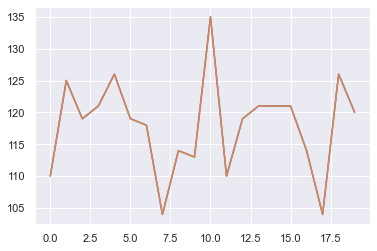

In [22]:
Xtrain, Xtest, ytrain, ytest= train_test_split(features, labels)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,ytrain)

NameError: name 'train_test_split' is not defined

In [229]:
y_fit = model.predict(Xtest)

In [230]:
ytest

406      115.0
6477     113.0
13894    120.0
14364    130.0
14584    130.0
         ...  
4511     127.0
149      140.0
6398     113.0
3167     115.0
629      115.0
Name: TOY, Length: 3669, dtype: float64

In [231]:
y_fit

array([118., 121., 120., ..., 121., 121., 120.])

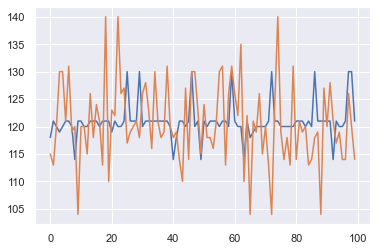

In [232]:
plt.plot(y_fit[:100])
plt.plot(ytest.values[:100])